# Carrego as funções, instalo pacotes e carrego as bibliotecas

In [60]:
#' ---
#' title: "Artigo Mineração de Dados"
#' author: "Alexandre Martins da Cunha"
#' date: " 18 de Agosto, 2017"
#' ---

#Opções
#Configurado o valor máximo do print antes de truncar
#options(max.print=.Machine$integer.max)
#Separador Decimal como vírgula
#options(OutDec=".")
#Desativar Notação Científica
options(scipen=999)
#Limite de Dígitos
#options(digits=15)


#Funções

#Função instalar pacotes
InstalaPacotes = function(pacote){
  if (pacote %in% rownames(installed.packages())){
    mensagem <- paste("Pacote", pacote, "Já Instalado")
  }else{
    mensagem <- paste("Instalando Pacote", pacote)
    install.packages(pacote)  
  }
  return(mensagem)  
}

#Instala Pacotes Necessários
InstalaPacotes("dplyr") 
InstalaPacotes("readr")
InstalaPacotes("stringr")
InstalaPacotes("stringi")
InstalaPacotes("sqldf")
InstalaPacotes("microbenchmark")
InstalaPacotes("mgcv")
InstalaPacotes("ggplot2")
InstalaPacotes("proto") #Adicionado para executar sqldf no Jupyter
InstalaPacotes("RSQLite")
InstalaPacotes("gsubfn") #Adicionado para executar sqldf no Jupyter
InstalaPacotes("chron") #Adicionado para executar sqldf no Jupyter
InstalaPacotes("xtable") #Exportar para o Latex

#Carrega Bibliotecas:
library('dplyr')
library('readr')
library('stringr')
library('stringi')
library('sqldf')
library('microbenchmark')
library('mgcv')
library('ggplot2')
library('xtable')

[1] "Pacote dplyr Já Instalado"

[1] "Pacote readr Já Instalado"

[1] "Pacote stringr Já Instalado"

[1] "Pacote stringi Já Instalado"

[1] "Pacote sqldf Já Instalado"

[1] "Pacote microbenchmark Já Instalado"

[1] "Pacote mgcv Já Instalado"

[1] "Pacote ggplot2 Já Instalado"

[1] "Pacote proto Já Instalado"

[1] "Pacote RSQLite Já Instalado"

[1] "Pacote gsubfn Já Instalado"

[1] "Pacote chron Já Instalado"

[1] "Pacote xtable Já Instalado"

# Aqui importo os dados já tratados(realizado a etapa anterior) pelo R, através do RData.

In [30]:
knitr::knit(text ='```{r}
load(url("https://github.com/almacunha/md/blob/master/RData?raw=true"))
```')

  |.................................................................| 100%
label: unnamed-chunk-1



[1] "\n```r\nload(url(\"https://github.com/almacunha/md/blob/master/RData?raw=true\"))\n```"

Verificar se o idparlamentar é único para cada Deputado. o Resultado deve ser apenas 1 Repetição n coluna QuantRepet

In [31]:
      #2.2.4.1 - Deputado(txNomeParlamentar) com mais de um ID(idecadastro) de cadastro
      ValidaParlamentar <- data.frame(base$idecadastro,base$txNomeParlamentar)
      colnames(ValidaParlamentar) <- c("ID","NomeParlamentar")
      ValidaParlamentar <- unique(ValidaParlamentar)
      ValidaParlamentar <- ValidaParlamentar[order(ValidaParlamentar$NomeParlamentar), ]
      ValidaParlamentar$QuantRepet <- ave(rep(1, nrow(ValidaParlamentar)), ValidaParlamentar$ID, FUN=cumsum)
      
      for(i in 1:nrow(ValidaParlamentar)){
        if(ValidaParlamentar$QuantRepet[i] > 1){
          print(ValidaParlamentar[i,,])  
        }
      }
print(ValidaParlamentar)

           ID                   NomeParlamentar QuantRepet
1      178957                 ABEL MESQUITA JR.          1
554    178864                    ADAIL CARNEIRO          1
847    178914              ADALBERTO CAVALCANTI          1
1371   178890              ADELMO CARNEIRO LEÃO          1
2408   178968                   ADELSON BARRETO          1
2820   133374                     ADEMIR CAMILO          1
3638   178903                  ADILTON SACHETTI          1
4194   141372                    AELTON FREITAS          1
4940   160508                   AFONSO FLORENCE          1
5737   136811                       AFONSO HAMM          1
6884   178835                      AFONSO MOTTA          1
8570   160527                 AGUINALDO RIBEIRO          1
9451   178836                         ALAN RICK          1
10062  160582                     ALBERTO FILHO          1
10356   73579                     ALBERTO FRAGA          1
10609  160559                     ALCEU MOREIRA         

Recriado o campo valorlíquido

In [32]:
#2.2.4.2 - Recriado campo VlwLiquido com base no vlrDocumento e vlrGlosa
      base$VericaVlwLiquido <- (base$vlrDocumento - base$vlrGlosa) - base$vlrRestituicao
      valorLiquido <- sqldf("SELECT * FROM base WHERE vlrLiquido != VericaVlwLiquido")
      #base$VericaVlwLiquido <- (base$VericaVlwLiquido - base$vlrRestituicao)
      base$vlrLiquido <- base$VericaVlwLiquido
      valorLiquido <- sqldf("SELECT * FROM base WHERE vlrLiquido != VericaVlwLiquido")

In [33]:
#2.2.4.3 - Procura valores negativos em campos numéricos que não seja a emissão de bilhestes (Este o único negativo)
      VericaValoresNegativos <- sqldf("SELECT * FROM base WHERE numSubCota !='999' AND vlrDocumento < 0")
      print(VericaValoresNegativos)

 [1] txNomeParlamentar         idecadastro              
 [3] sgUF                      sgPartido                
 [5] numSubCota                txtDescricao             
 [7] numEspecificacaoSubCota   txtDescricaoEspecificacao
 [9] txtFornecedor             txtCNPJCPF               
[11] datEmissao                vlrDocumento             
[13] vlrGlosa                  vlrLiquido               
[15] txtPassageiro             txtTrecho                
[17] vlrRestituicao            nuDeputadoId             
[19] ideDocumento              VericaVlwLiquido         
<0 rows> (or 0-length row.names)


In [34]:
#Criar Data Frames para cada Despesa:
      
      #1 - MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR
      ManutEscrit <- sqldf("SELECT * FROM base WHERE numSubCota='1'")
      summary(ManutEscrit$vlrLiquido)
      #TotalDespesasPorValor <- aggregate(ManutEscrit$vlrLiquido, list(ManutEscrit$txtDescricao), sum)
      
      #3 - COMBUSTÍVEIS E LUBRIFICANTES
      CombLub <- sqldf("SELECT * FROM base WHERE numSubCota='3'")
      summary(CombLub$vlrLiquido)

      #4 - CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.
      ConPesTrabTec <- sqldf("SELECT * FROM base WHERE numSubCota='4'")
      summary(ConPesTrabTec$vlrLiquido)
      
      #5 - DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.
      DivAtivPar <- sqldf("SELECT * FROM base WHERE numSubCota='5'")
      summary(DivAtivPar$vlrLiquido)
      
      #8 - SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.
      ServSeg <- sqldf("SELECT * FROM base WHERE numSubCota='8'")
      summary(ServSeg$vlrLiquido)
      
      #9 - PASSAGENS AÉREAS
      PassAero <- sqldf("SELECT * FROM base WHERE numSubCota='9'")
      summary(PassAero$vlrLiquido)
      
      #10 - TELEFONIA
      Telefonia <- sqldf("SELECT * FROM base WHERE numSubCota='10'")
      summary(Telefonia$vlrLiquido)
      
      #11 - SERVIÇOS POSTAIS
      ServPostal <- sqldf("SELECT * FROM base WHERE numSubCota='11'")
      summary(ServPostal$vlrLiquido)
      
      #12 - ASSINATURA DE PUBLICAÇÕES
      AssPub <- sqldf("SELECT * FROM base WHERE numSubCota='12'")
      summary(AssPub$vlrLiquido)
      
      #13 - FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR
      ForncAlim <- sqldf("SELECT * FROM base WHERE numSubCota='13'")
      summary(ForncAlim$vlrLiquido)
      
      #14 - HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL
      Hospedagem <- sqldf("SELECT * FROM base WHERE numSubCota='14'")
      summary(Hospedagem$vlrLiquido)
      
      #119 -  LOCAÇÃO OU FRETAMENTO DE AERONAVES
      LocAero <- sqldf("SELECT * FROM base WHERE numSubCota='119'")
      summary(LocAero$vlrLiquido)
      
      #120 - LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES
      LocVei <- sqldf("SELECT * FROM base WHERE numSubCota='120'")
      summary(LocVei$vlrLiquido)
      
      #121 - LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES
      LocEmbar <- sqldf("SELECT * FROM base WHERE numSubCota='121'")
      summary(LocEmbar$vlrLiquido)
      
      #122 - SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO
      ServTrans <- sqldf("SELECT * FROM base WHERE numSubCota='122'")
      summary(ServTrans$vlrLiquido)
      
      #123 - PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS
      Passagens <- sqldf("SELECT * FROM base WHERE numSubCota='123'")
      summary(Passagens$vlrLiquido)
      
      #137 -  PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR
      Treinamentos <- sqldf("SELECT * FROM base WHERE numSubCota='137'")
      summary(Treinamentos$vlrLiquido)
      
      #999 - Emissão Bilhete Aéreo
      EmPass <- sqldf("SELECT * FROM base WHERE numSubCota='999'")
      summary(EmPass$vlrLiquido)
      

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.2   150.0   365.0  1038.7  1110.0 21088.7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   100.0   140.0   260.8   185.1  6000.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     30    3000    6780    7927   10000   62000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     700    2000    4988    6000  184500 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    4.0   156.2   300.0  1845.4  2854.9  8700.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   25.0   533.9   840.6  1003.1  1265.2 16137.2 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.05    75.05   180.40   334.78   409.70 30202.30 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00    23.70    45.48   135.99    79.38 69610.30 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.9   117.5   273.2   363.2   485.0  4000.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   25.00   46.52   58.31   76.00 2360.50 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   133.0   200.0   323.2   350.0  5024.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    6000    8450   10152   12500   39600 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     75    2450    3800    4314    6000   17000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   51.45  106.00  947.07  672.50 6000.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.40    5.20   10.80   33.36   25.00 2413.85 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.03   40.03   80.72  102.95  143.72 1833.66 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    2907    7327    5527    7604    7777 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2911.5    80.0   392.6   426.9   791.7 11978.3 

In [38]:
#Técnica de Mineração de dados
    #3.1 - Técnica Agrupamento,    
      TotalAnual <- group_by(base,sgUF,sgPartido,txNomeParlamentar)%>%summarise(Total=sum(vlrLiquido))
    print(TotalAnual)
      

# A tibble: 575 x 4
# Groups:   sgUF, sgPartido [?]
     sgUF sgPartido txNomeParlamentar    Total
   <fctr>    <fctr>            <fctr>    <dbl>
 1     AC     PCdoB      MOISÉS DINIZ 202896.4
 2     AC      PMDB     FLAVIANO MELO 482742.6
 3     AC      PMDB     JÉSSICA SALES 531485.4
 4     AC       PRB         ALAN RICK 542491.6
 5     AC       PSB     CÉSAR MESSIAS 444184.4
 6     AC      PSDB             ROCHA 645643.6
 7     AC        PT           ANGELIM 478799.2
 8     AC        PT      LEO DE BRITO 552718.6
 9     AC        PT      SIBÁ MACHADO 348313.9
10     AL       PDT     RONALDO LESSA 500286.2
# ... with 565 more rows


In [44]:
#Valores da Cota por Estado
        AC	<- 44632.46 *12
        AL	<- 40944.10 *12
        AM	<- 43570.12 *12
        AP	<- 43374.78 *12
        BA	<- 39010.85 *12
        CE	<- 42451.77 *12
        DF	<- 30788.66 *12
        ES	<- 37423.91 *12
        GO	<- 35507.06 *12
        MA	<- 42151.69 *12
        MG	<- 36092.71 *12
        MS	<- 40542.84 *12
        MT	<- 39428.03 *12
        PA	<- 42227.45 *12
        PB	<- 42032.56 *12
        PE	<- 41676.80 *12
        PI	<- 40971.77 *12
        PR	<- 38871.86 *12
        RJ	<- 35759.97 *12
        RN	<- 42731.99 *12
        RO	<- 43672.49 *12
        RR	<- 45612.53 *12
        RS	<- 40875.90 *12
        SC	<- 39877.78 *12
        SE	<- 40139.26 *12
        SP	<- 37043.53 * 12
        TO	<- 39503.61 * 12

#Parlamentares que excederam suas cotas anuais em 2016
Gastos <- sqldf("SELECT * FROM TotalAnual WHERE (sgUF='TO' AND Total > '474043.32') OR
                        (sgUF='SP' AND Total > '444522.36') OR (sgUF='SE' AND Total > '481671.12') OR
                        (sgUF='SC' AND Total > '478533.36') OR (sgUF='RS' AND Total > '490510.80') OR
                        (sgUF='RR' AND Total > '547350.36') OR (sgUF='RO' AND Total > '524069.88') OR
                        (sgUF='RN' AND Total > '512783.88') OR (sgUF='RJ' AND Total > '429119.64') OR
                        (sgUF='PR' AND Total > '466462.32') OR (sgUF='PI' AND Total > '491661.32') OR
                        (sgUF='PE' AND Total > '500121.32') OR (sgUF='PB' AND Total > '504390.72') OR
                        (sgUF='PA' AND Total > '506729.40') OR (sgUF='MT' AND Total > '473136.36') OR 
                        (sgUF='MS' AND Total > '486514.08') OR (sgUF='MG' AND Total > '433112.52') OR
                        (sgUF='MA' AND Total > '505820.28') OR (sgUF='GO' AND Total > '426084.72') OR
                        (sgUF='ES' AND Total > '449086.92') OR (sgUF='DF' AND Total > '369463.92') OR
                        (sgUF='CE' AND Total > '509421.24') OR (sgUF='BA' AND Total > '468130.20') OR
                        (sgUF='AP' AND Total > '520497.36') OR (sgUF='AM' AND Total > '522841.44') OR
                        (sgUF='AL' AND Total > '491329.20') OR (sgUF='AC' AND Total > '535589.52')
                        ")
print(Gastos)

    sgUF sgPartido         txNomeParlamentar    Total
1     AC       PRB                 ALAN RICK 542491.6
2     AC      PSDB                     ROCHA 645643.6
3     AC        PT              LEO DE BRITO 552718.6
4     AL       PDT             RONALDO LESSA 500286.2
5     AL        PT                    PAULÃO 493759.8
6     AM       PRB              SILAS CÂMARA 607901.2
7     AM       PSD                ÁTILA LINS 563075.4
8     AP       PDT              ROBERTO GÓES 531384.7
9     AP      PMDB             CABUÇU BORGES 522504.7
10    AP        PR           VINICIUS GURGEL 545108.7
11    AP       PSD           MARCOS REATEGUI 523116.7
12    BA       DEM       JOSÉ CARLOS ALELUIA 471636.4
13    BA       DEM                 PAULO AZI 514136.6
14    BA     PCdoB            DANIEL ALMEIDA 478568.1
15    BA        PP                 CACÁ LEÃO 472179.6
16    BA        PP            ROBERTO BRITTO 510490.8
17    BA       PRB            MÁRCIO MARINHO 471043.8
18    BA       PRB          

## Aqui começa os cálculos e processos sobre outliers em sí.

In [51]:
#3.2 - Técnica Outliers:

      Quartil3 <- group_by(base,txtDescricao)%>%summarise(Quartil3=quantile(vlrLiquido)[4])
      Quartil2 <- group_by(base,txtDescricao)%>%summarise(Quartil2=quantile(vlrLiquido)[3])
      Quartil1 <- group_by(base,txtDescricao)%>%summarise(Quartil1=quantile(vlrLiquido)[2])
      Quartil87.5 <- group_by(base,txtDescricao)%>%summarise(Quartil87.5=quantile(vlrLiquido,probs = c(.875))[1])
      Quartil12.5 <- group_by(base,txtDescricao)%>%summarise(Quartil12.5=quantile(vlrLiquido, probs = c(.125))[1])
      IQR <- group_by(base,txtDescricao)%>%summarise(IQR=IQR(vlrLiquido))
      outlier_base <- data.frame(Quartil3)
      outlier_base$Quartil1 <- Quartil1$Quartil1
      outlier_base$IQR <- IQR$IQR
      outlier_base$Quartil2 <- Quartil2$Quartil2
      outlier_base$Quartil87.5 <- Quartil87.5$Quartil87.5
      outlier_base$Quartil112.5 <-Quartil12.5$Quartil12.5      
      Quartil3 <- NULL
      Quartil2 <- NULL
      Quartil1 <- NULL
      Quartil87.5 <- NULL
      Quartil12.5 <- NULL
      IQR <- NULL

  #Cálculo de outliers Q3+1.5*(Q3-Q1)
      outlier_base$outlierComum <-  outlier_base$Quartil3 + 1.5 * (outlier_base$IQR)      
      #Coeficiente octílico - OC
      OC <- (outlier_base$Quartil87.5 - 2 * outlier_base$Quartil2 + outlier_base$Quartil112.5) / (outlier_base$Quartil87.5 - outlier_base$Quartil112.5) 
      
      #Cálculo de outliers  Q3+1.5*(Q3-Q1)*e0.5*(OC)
      outlier_base$outlierRobusto <- outlier_base$Quartil3 + 1.5 * outlier_base$IQR * exp(-0.5*OC)
      print("DataFrame outlier_base")
      print(outlier_base)
      
      TotalDespesas <- aggregate(base$vlrLiquido, list(base$txtDescricao), sum)
     #TotalDespesas <- group_by(base,txtDescricao)%>%summarise(Total=sum(vlrLiquido))
      print("DataFrame Total de Despesas")
      print(TotalDespesas)      
      
      #Total de gasto de parlamentar por tipo de gasto, com partido e nome
      totalParlamentares <- group_by(base,txtDescricao,sgUF,sgPartido,txNomeParlamentar)%>%summarise(Total=sum(vlrLiquido))
      print("DataFrame Total Parlamentares")
      print(totalParlamentares)
      
      #Faz o join das bases, de modo a cada linha contes todos os dados necessários
      outlierRobusto <- merge(totalParlamentares,outlier_base)
      

[1] "DataFrame outlier_base"
                                                txtDescricao   Quartil3
1                                  ASSINATURA DE PUBLICAÇÕES   485.0000
2                              COMBUSTÍVEIS E LUBRIFICANTES.   185.1325
3              CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS. 10000.0000
4                       DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  6000.0000
5                                      Emissão Bilhete Aéreo   791.6975
6                 FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR    76.0000
7     HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.   350.0000
8                         LOCAÇÃO OU FRETAMENTO DE AERONAVES 12500.0000
9                       LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES   672.5000
10             LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES  6000.0000
11 MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR  1110.0000
12         PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR  7604.2000
13                                 

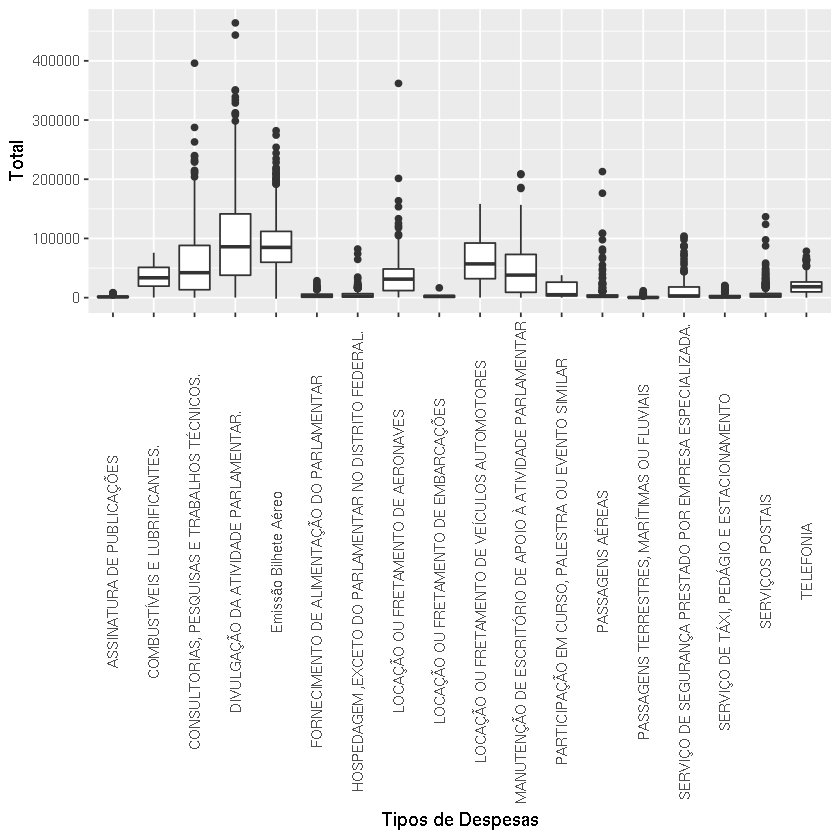

In [52]:
 ggplot(outlierRobusto, aes(x=txtDescricao, y=Total))+ xlab("Tipos de Despesas") + geom_boxplot() + theme(axis.text.x  = element_text(angle=90, vjust=0.5))

In [53]:
outlierRobusto$Quartil3 <- NULL
      outlierRobusto$Quartil1 <- NULL
      outlierRobusto$Quartil2 <- NULL
      outlierRobusto$Quartil87.5 <- NULL
      outlierRobusto$Quartil112.5 <- NULL
      outlierRobusto$IQR <- NULL
      outlierRobusto$sgUF <- NULL
      outlierRobusto$sgPartido <- NULL
      
      #Copia a base para o método comum outlierComum o essas bases serão usadas mais a frente
      outlierComum <- outlierRobusto

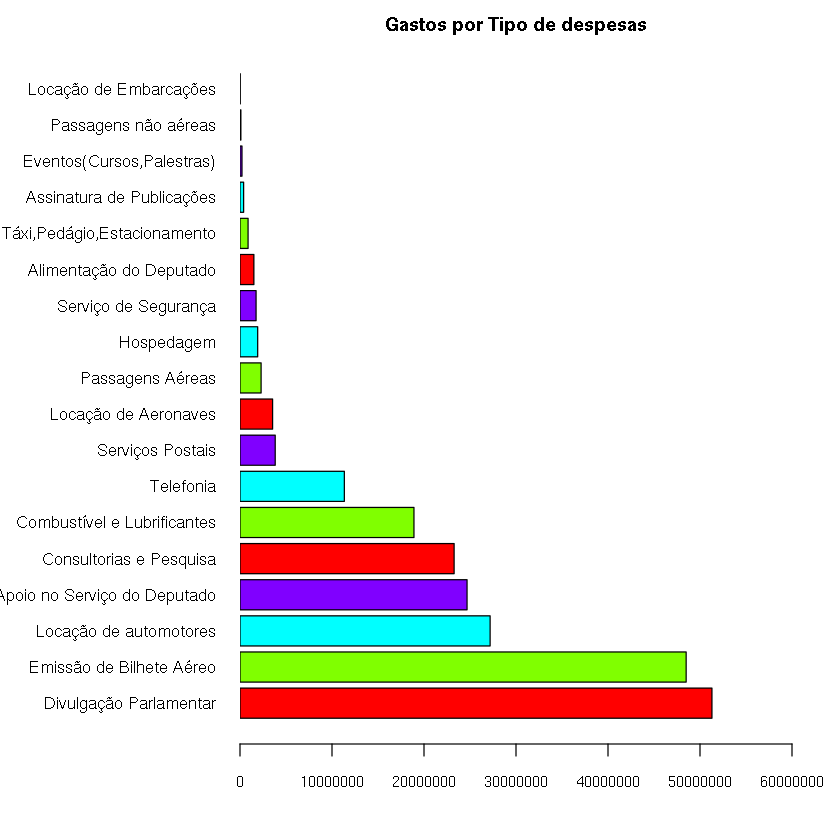

In [54]:
 #Tipos de Gastos
      outlier0 <- group_by(outlierRobusto,txtDescricao)%>%summarise(Total=sum(Total))
      outlier0 = outlier0 %>% arrange(-Total)
      par(mar=c(4, 10, 2, 2))
      barplot(
        outlier0$Total,
        names.arg=c("Divulgação Parlamentar","Emissão de Bilhete Aéreo","Locação de automotores",
                    "Apoio no Serviço do Deputado","Consultorias e Pesquisa","Combustível e Lubrificantes",
                    "Telefonia","Serviços Postais","Locação de Aeronaves","Passagens Aéreas",
                    "Hospedagem","Serviço de Segurança","Alimentação do Deputado",
                    "Táxi,Pedágio,Estacionamento","Assinatura de Publicações","Eventos(Cursos,Palestras)",
                    "Passagens não aéreas","Locação de Embarcações"),
        #names.arg=outlier1$txtDescricao,
        beside = TRUE, 
        horiz=TRUE, 
        las=1,  
        xlim=c(0,60000000),
        cex.axis = 0.7,  
        cex.names = 0.8,  
        col=rainbow(4),
        xpd=FALSE,
        cex.main = 0.9,
        main="Gastos por Tipo de despesas"
      )

In [58]:
# Método Robusto.
      outlierRobusto$outlierComum <- NULL
      names(outlierRobusto) <- c("txtDescricao","txNomeParlamentar", "Total", "outlier" )
      
      #Por fim identifica os outliers por despesas, reduzindo o total por despesas de cada parlamentar 
      #com o gasto limite de outliers
      outlierRobusto <- sqldf("SELECT * FROM outlierRobusto WHERE Total >= outlier")
      print("DataFrame outlier Robusto")
      print(outlierRobusto)
      
      TotalDespesasRobusto <- sqldf("SELECT DISTINCT outlier , txtDescricao FROM outlierRobusto WHERE Total >= outlier")
      print("DataFrame Total de Despesas Robusto")
      print(TotalDespesasRobusto)      
      
      outlier <- outlierRobusto
      
      outlier$Gastos <-  (outlierRobusto$Total - outlierRobusto$outlier)
      economiaOR <- group_by(outlier,txtDescricao)%>%summarise(Economia=sum(Gastos))
      print("DataFrame economiaOR")
      print(economiaOR)      
      economiaORFinal <- group_by(economiaOR)%>%summarise(Total=sum(Economia))
      print("DataFrame economiaORFinal")
      print(economiaORFinal)      
      #xtable(economiaOR) #Importa para o Latex
      names(outlierRobusto) <- c("txtDescricao", "txNomeParlamentar", "Total", "outlierRobusto")
      outlier <- NULL

      
      

[1] "DataFrame outlier Robusto"
                                                  txtDescricao
1                                    ASSINATURA DE PUBLICAÇÕES
2                                    ASSINATURA DE PUBLICAÇÕES
3                                    ASSINATURA DE PUBLICAÇÕES
4                                    ASSINATURA DE PUBLICAÇÕES
5                                    ASSINATURA DE PUBLICAÇÕES
6                                    ASSINATURA DE PUBLICAÇÕES
7                                    ASSINATURA DE PUBLICAÇÕES
8                                    ASSINATURA DE PUBLICAÇÕES
9                                    ASSINATURA DE PUBLICAÇÕES
10                                   ASSINATURA DE PUBLICAÇÕES
11                                   ASSINATURA DE PUBLICAÇÕES
12                                   ASSINATURA DE PUBLICAÇÕES
13                                   ASSINATURA DE PUBLICAÇÕES
14                                   ASSINATURA DE PUBLICAÇÕES
15                     

[1] "DataFrame Total de Despesas Robusto"
       outlier                                              txtDescricao
1    954.92156                                 ASSINATURA DE PUBLICAÇÕES
2    318.02540                             COMBUSTÍVEIS E LUBRIFICANTES.
3  19781.98006             CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.
4  11667.64263                      DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.
5   1775.07643                                     Emissão Bilhete Aéreo
6    139.75537                FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR
7    597.05920    HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.
8  20583.03390                        LOCAÇÃO OU FRETAMENTO DE AERONAVES
9   1257.69740                      LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES
10 10646.19718             LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES
11  2081.90063 MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR
12 18626.95008         PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR
13  2225.

In [59]:
 # Método Comum. 
      outlierComum$outlierRobusto <- NULL
      names(outlierComum) <- c("txtDescricao", "txNomeParlamentar", "Total", "outlier")
      
      #Por fim identifica os outliers por despesas, reduzindo o total por despesas de cada parlamentar 
      #com o gasto limite de outliers
      outlierComum <- sqldf("SELECT * FROM outlierComum WHERE Total >= outlier")
      print("DataFrame outlier Comum")
      print(outlierComum)

      TotalDespesasComum <- sqldf("SELECT DISTINCT outlier , txtDescricao FROM outlierComum WHERE Total >= outlier")
      print("DataFrame Total Despesas Comum")
      print(TotalDespesasComum) 

      outlier <- outlierComum
      
      outlier$Gastos <-  (outlierComum$Total - outlierComum$outlier)
      economiaOC <- group_by(outlier,txtDescricao)%>%summarise(Economia=sum(Gastos))
     print("DataFrame economiaOC")
      print(economiaOC)
      economiaOCFinal <- group_by(economiaOC)%>%summarise(Total=sum(Economia))      
     print("DataFrame economiaOCFinal")
      print(economiaOCFinal)
      #xtable(economiaOC) #Importa para o Latex     
      names(outlierComum) <- c("txtDescricao", "txNomeParlamentar", "Total", "outlierComum")      
      outlier <- NULL
      
      

[1] "DataFrame outlier Comum"
                                                  txtDescricao
1                                    ASSINATURA DE PUBLICAÇÕES
2                                    ASSINATURA DE PUBLICAÇÕES
3                                    ASSINATURA DE PUBLICAÇÕES
4                                    ASSINATURA DE PUBLICAÇÕES
5                                    ASSINATURA DE PUBLICAÇÕES
6                                    ASSINATURA DE PUBLICAÇÕES
7                                    ASSINATURA DE PUBLICAÇÕES
8                                    ASSINATURA DE PUBLICAÇÕES
9                                    ASSINATURA DE PUBLICAÇÕES
10                                   ASSINATURA DE PUBLICAÇÕES
11                                   ASSINATURA DE PUBLICAÇÕES
12                                   ASSINATURA DE PUBLICAÇÕES
13                                   ASSINATURA DE PUBLICAÇÕES
14                                   ASSINATURA DE PUBLICAÇÕES
15                       

[1] "DataFrame Total Despesas Comum"
      outlier                                              txtDescricao
1   1036.2500                                 ASSINATURA DE PUBLICAÇÕES
2    312.8312                             COMBUSTÍVEIS E LUBRIFICANTES.
3  20500.0000             CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.
4  13950.0000                      DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.
5   1859.2438                                     Emissão Bilhete Aéreo
6    152.5000                FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR
7    675.5000    HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.
8  22250.0000                        LOCAÇÃO OU FRETAMENTO DE AERONAVES
9   1604.0788                      LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES
10 11325.0000             LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES
11  2550.0000 MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR
12 14650.1500         PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR
13  2362.0575              